# Image Classifer Model Using CNN

In [2]:
#importing libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

C:\Users\ADMIN\anaconda3\envs\Tensorflow\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
import tensorflow as tf
from tensorflow import keras 

In [5]:
fashion_mnist=keras.datasets.fashion_mnist

(x_train , y_train) , (x_test , y_test)=fashion_mnist.load_data()

In [6]:
class_names = ['T-shirt/top' , 'Trousar' , 'Pullover' , 'Dress' , 'Coat',
               'Sandal' , 'Shirt' ,'Sneaker' , 'Bag' , 'Ankle Boot']

In [7]:
#reshaping as we req 3d data in CNN 
x_train=x_train.reshape((60000,28,28,1))
x_test=x_test.reshape((10000,28,28,1))

In [8]:
#Data Normalization 

x_train_n=x_train/255
x_test_n=x_test/255

# Spliting the Data 

train data

validation data 

test data 

In [9]:
x_valid ,x_train=x_train_n[:5000] ,x_train_n[5000:]
y_valid , y_train=y_train[:5000] , y_train[5000:]
x_test=x_test_n

# Creat the model Architecture

In [10]:
np.random.seed(42)
tf.random.set_seed(42)

In [11]:
model = keras.models.Sequential()

#convolution layer
model.add(keras.layers.Conv2D(filters= 32 , kernel_size =(3,3) , strides = 1 , 
                              padding ='valid',activation='relu', input_shape = (28,28,1)))
#pooling layer
model.add(keras.layers.MaxPooling2D((2,2)))

#flatenning layer
model.add(keras.layers.Flatten())
#dese layer 1
model.add(keras.layers.Dense(300 , activation ='relu'))
#dense layer 2
model.add(keras.layers.Dense(100 , activation = 'relu'))
#output layer 
model.add(keras.layers.Dense(10 , activation = 'softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

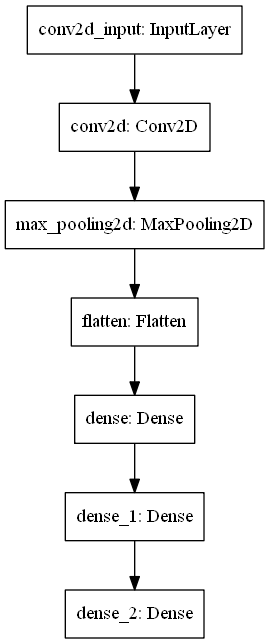

In [14]:
import pydot
keras.utils.plot_model(model)

In [15]:
model.compile(loss = 'sparse_categorical_crossentropy' , 
             optimizer = 'sgd',
             metrics =['accuracy'])

In [16]:
model_fit= model.fit(x_train , y_train , epochs =10 , batch_size = 64,
                         validation_data = (x_valid , y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 23s 422us/sample - loss: 0.8754 - accuracy: 0.7047 - val_loss: 0.5981 - val_accuracy: 0.7790
Epoch 2/10
55000/55000 [==============================] - 23s 426us/sample - loss: 0.5385 - accuracy: 0.8050 - val_loss: 0.5430 - val_accuracy: 0.8032
Epoch 3/10
55000/55000 [==============================] - 25s 462us/sample - loss: 0.4801 - accuracy: 0.8276 - val_loss: 0.5660 - val_accuracy: 0.8120
Epoch 4/10
55000/55000 [==============================] - 24s 440us/sample - loss: 0.4435 - accuracy: 0.8409 - val_loss: 0.4583 - val_accuracy: 0.8386
Epoch 5/10
55000/55000 [==============================] - 23s 421us/sample - loss: 0.4164 - accuracy: 0.8513 - val_loss: 0.4419 - val_accuracy: 0.8360
Epoch 6/10
55000/55000 [==============================] - 23s 412us/sample - loss: 0.3976 - accuracy: 0.8576 - val_loss: 0.4223 - val_accuracy: 0.8434
Epoch 7/10
55000/55000 [=====================

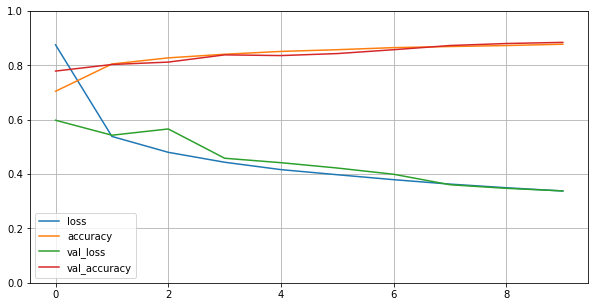

In [18]:
#ploting 

pd.DataFrame(model_fit.history).plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()



In [19]:
#testing model 
evl=model.evaluate(x_test,y_test)

10000/10000 [==============================] - 2s 177us/sample - loss: 0.3644 - accuracy: 0.8699


In [20]:
evl

[0.3644242218732834, 0.8699]

In [21]:
x_new=x_train[:6]


In [24]:
#predicing model 
y_pred=model.predict_classes(x_new)
y_pred

array([4, 0, 7, 9, 9, 9], dtype=int64)

In [25]:
np.array(class_names)[y_pred]

array(['Coat', 'T-shirt/top', 'Sneaker', 'Ankle Boot', 'Ankle Boot',
       'Ankle Boot'], dtype='<U11')

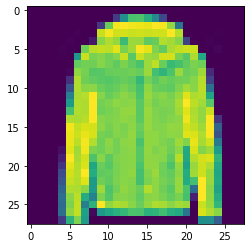

In [26]:
plt.imshow(x_new[0])

AxesImage(54,36;334.8x217.44)


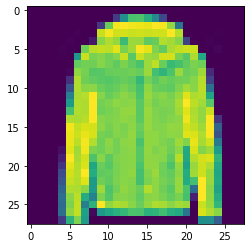

In [28]:
print(plt.imshow(x_new[0].reshape((28,28))))

# importance of Pooling layer 

# poolinglayer vs No poolinglayer

In [36]:
#model with pooling layer 

modelA= keras.models.Sequential()
modelA.add(keras.layers.Conv2D(filters= 32 , kernel_size =(3,3) , strides = 1 , 
                              padding ='valid',activation='relu', input_shape = (28,28,1)))
modelA.add(keras.layers.MaxPooling2D((2,2)))
modelA.add(keras.layers.Flatten())
modelA.add(keras.layers.Dense(300 , activation ='relu'))
modelA.add(keras.layers.Dense(100 , activation = 'relu'))
modelA.add(keras.layers.Dense(10 , activation = 'softmax'))

In [33]:
#Model without Pooling layer 
modelB= keras.models.Sequential()
modelB.add(keras.layers.Conv2D(filters= 32 , kernel_size =(3,3) , strides = 1 , 
                              padding ='valid',activation='relu', input_shape = (28,28,1)))
modelB.add(keras.layers.Flatten())
modelB.add(keras.layers.Dense(300 , activation ='relu'))
modelB.add(keras.layers.Dense(100 , activation = 'relu'))
modelB.add(keras.layers.Dense(10 , activation = 'softmax'))

In [37]:
modelA.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               1622700   
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
____________________________________________

In [38]:
modelB.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               6489900   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 6,521,330
Trainable params: 6,521,330
Non-trainable params: 0
_________________________________________________________________


In [39]:
modelA.compile(loss = 'sparse_categorical_crossentropy',
               optimizer = 'sgd',
               metrics = ['accuracy'])

modelB.compile(loss = 'sparse_categorical_crossentropy',
               optimizer = 'sgd',
               metrics = ['accuracy'])

In [40]:
model_fit_A = modelA.fit(x_train , y_train , epochs=3 , batch_size=64,
                             validation_data=(x_valid , y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/3
55000/55000 [==============================] - 25s 452us/sample - loss: 0.8518 - accuracy: 0.7073 - val_loss: 0.5977 - val_accuracy: 0.7812
Epoch 2/3
55000/55000 [==============================] - 24s 440us/sample - loss: 0.5308 - accuracy: 0.8084 - val_loss: 0.5432 - val_accuracy: 0.8044
Epoch 3/3
55000/55000 [==============================] - 25s 446us/sample - loss: 0.4734 - accuracy: 0.8310 - val_loss: 0.5069 - val_accuracy: 0.8186


In [41]:
model_fit_B= modelB.fit(x_train , y_train , epochs=3 , batch_size=64,
                             validation_data=(x_valid , y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/3
55000/55000 [==============================] - 52s 949us/sample - loss: 0.7135 - accuracy: 0.7547 - val_loss: 0.5479 - val_accuracy: 0.7986
Epoch 2/3
55000/55000 [==============================] - 50s 918us/sample - loss: 0.4874 - accuracy: 0.8227 - val_loss: 0.4974 - val_accuracy: 0.8170
Epoch 3/3
55000/55000 [==============================] - 49s 890us/sample - loss: 0.4378 - accuracy: 0.8418 - val_loss: 0.4914 - val_accuracy: 0.8324


# END